# Ensemble

In [1]:
import pandas as pd
import numpy as np

In [2]:
# external imports
%run ../common/utilities.ipynb

**Load Pickled Files**

In [3]:
X_validation = load_object("../input_data/", "X_val")
y_validation = load_object("../input_data/", "y_val")
X_test = load_object("../input_data/", "X_test")
y_test = load_object("../input_data/", "y_test")

**Prep models**

In [4]:
logistic_regression = load_object("./best_saved_models/", "logistic_regression")
random_forest = load_object("./best_saved_models/", "random_forest")
xgboost_model = load_object("./best_saved_models/", "XGBoost")

## Compute F2 for Validation Data:

In [18]:
pred_lr = logistic_regression.predict(X_validation)
pred_rfc = random_forest.predict(X_validation)
pred_xgb = xgboost_model.predict(X_validation)

In [19]:
# select top3 based on Validation Performance
ensembler = pd.DataFrame({
                        "LR":pred_lr,
                        "RFC":pred_rfc,
                        "XGB":pred_xgb
                    })

In [20]:
# axis =1 or ‘columns’ : get mode of each row
ensembled_output = ensembler.mode(axis=1)[0]

In [21]:
f2_measure(y_validation, ensembled_output)

0.507936507936508

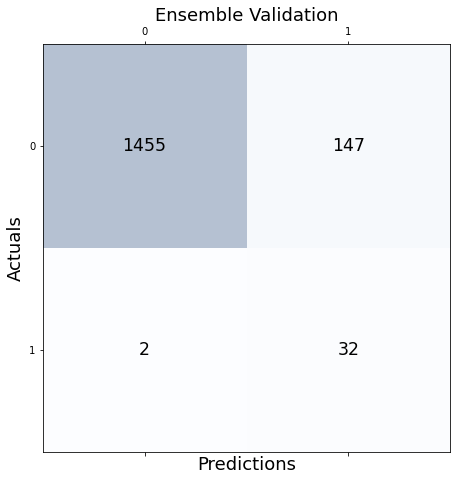

In [22]:
confusion_matrix_plotter(y_validation, ensembled_output, "Ensemble Validation")

## Compute F2 for Test Data:

In [9]:
pred_lr = logistic_regression.predict(X_test)
pred_rfc = random_forest.predict(X_test)
pred_xgb = xgboost_model.predict(X_test)

In [10]:
# select top3 based on Validation Performance
ensembler = pd.DataFrame({
                        "LR":pred_lr,
                        "RFC":pred_rfc,
                        "XGB":pred_xgb
                    })

In [11]:
# axis =1 or ‘columns’ : get mode of each row
ensembled_output = ensembler.mode(axis=1)[0]

In [12]:
f2_measure(y_test, ensembled_output)

0.43026706231454004

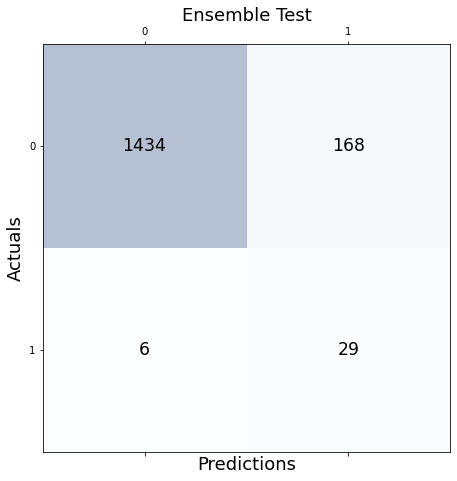

In [16]:
confusion_matrix_plotter(y_test, ensembled_output, "Ensemble Test")